### Importing the Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import chi2_contingency 

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Loading the Data

In [2]:
df=pd.read_csv("../input/311-service-requests-nyc/311_Service_Requests_from_2010_to_Present.csv")
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### Descriptive Analysis

In [3]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [4]:
df.shape

(364558, 53)

<p style="color:green">We see lots of missing value. All the values given in the above does not provides us very clear insights about our data so we can move ahead with Exploratory Data Analysis.

### Feature Creation

In [5]:
# Converting the data into datetime format
df["Created Date"]=pd.to_datetime(df["Created Date"])
df["Closed Date"]=pd.to_datetime(df["Closed Date"])

In [6]:
#Creating the new column that consist the amount of time taken to resolve the complaint
df["Request_Closing_Time"]=(df["Closed Date"]-df["Created Date"])

Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df["Request_Closing_Time"]=Request_Closing_Time

### Exploratory Data Analysis

In [7]:
df["Agency"].unique()

array(['NYPD'], dtype=object)

<p style="color:green">All of our data belongs to a single agency  NYPD i.e New York City Police Department.

<function matplotlib.pyplot.show(*args, **kw)>

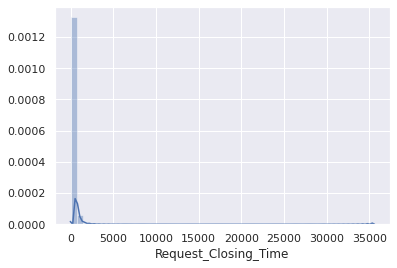

In [8]:
#Univariate Distribution Plot for Request Closing Time
sns.distplot(df["Request_Closing_Time"])
plt.show

In [9]:
print("Total Number of Concerns : ",len(df),"\n")
print("Percentage of Requests took less than 100 hour to get solved   : ",round((len(df)-(df["Request_Closing_Time"]>100).sum())/len(df)*100,2),"%")
print("Percentage of Requests took less than 1000 hour to get solved : ",round((len(df)-(df["Request_Closing_Time"]>1000).sum())/len(df)*100,2),"%")

Total Number of Concerns :  364558 

Percentage of Requests took less than 100 hour to get solved   :  33.63 %
Percentage of Requests took less than 1000 hour to get solved :  97.44 %


<p style="color:green">From above we can see that the data is heavily skewed. There are lots of outliers. Almost more than 97% of the requests are solved in less than 1000 hours i.e 17 days.

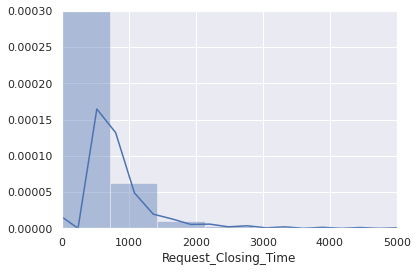

In [10]:
#Univariate Distribution Plot for Request Closing Time
sns.distplot(df["Request_Closing_Time"])
plt.xlim((0,5000))
plt.ylim((0,0.0003))
plt.show()

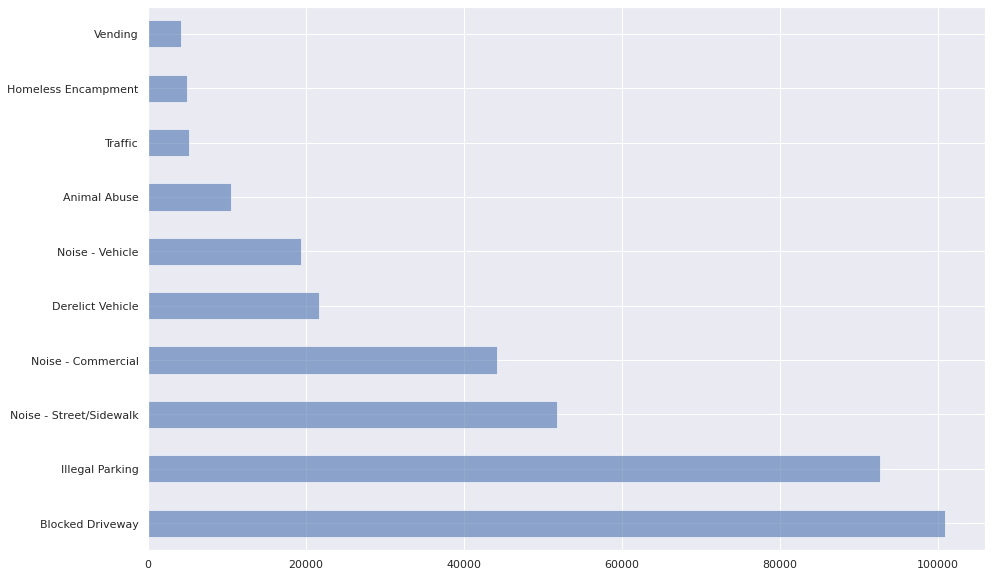

In [11]:
# Count plot to understand the type of the complaint raised
df['Complaint Type'].value_counts()[:10].plot(kind='barh',alpha=0.6,figsize=(15,10))
plt.show()

<p style="color:green">Almost around 85% of the the requests belongs to transport (Blocked driveway,Illegal Parking, Vehicle Noise, Road Traffic etc ).

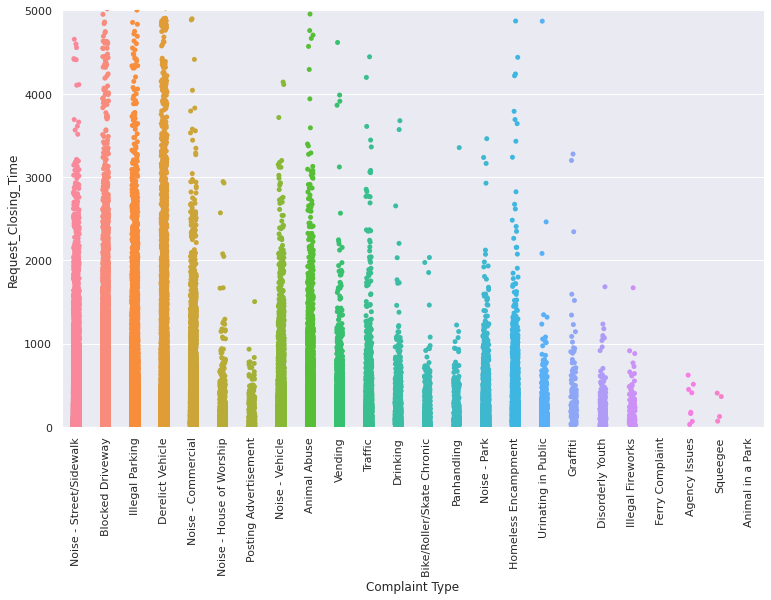

In [12]:
#Categorical Scatter Plot to understand which type of complaints are taking more time to get resolved
g=sns.catplot(x='Complaint Type', y="Request_Closing_Time",data=df)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

<p style="color:green">As we have got above that almost around 85% of the the requests belongs to transport (Blocked driveway,Illegal Parking, Vehicle Noise, Road Traffic etc ). From this plot we can understand that most of these issues have taken more time to get resolved. Government should take measure in incresing awareness and find some measures to reduce traffic problems.

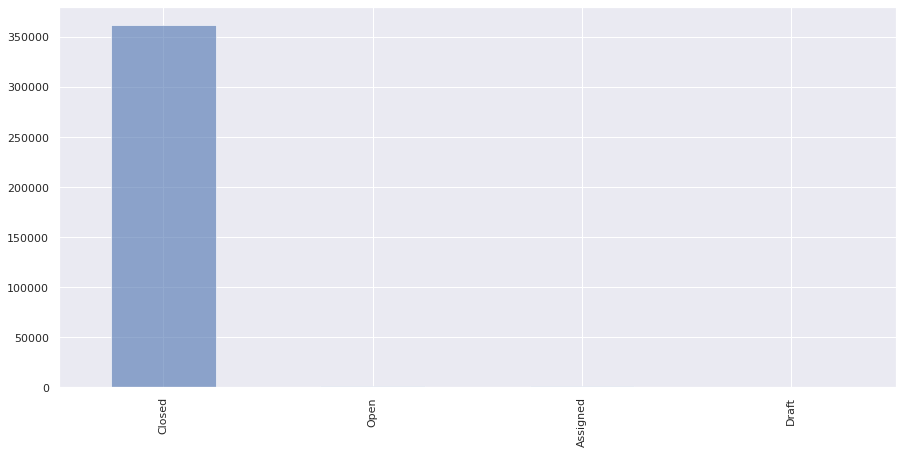

In [13]:
# Count plot to know the status of the requests
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,7))
plt.show()

<p style="color:green">As of now almost 98% of the cases are closed state.

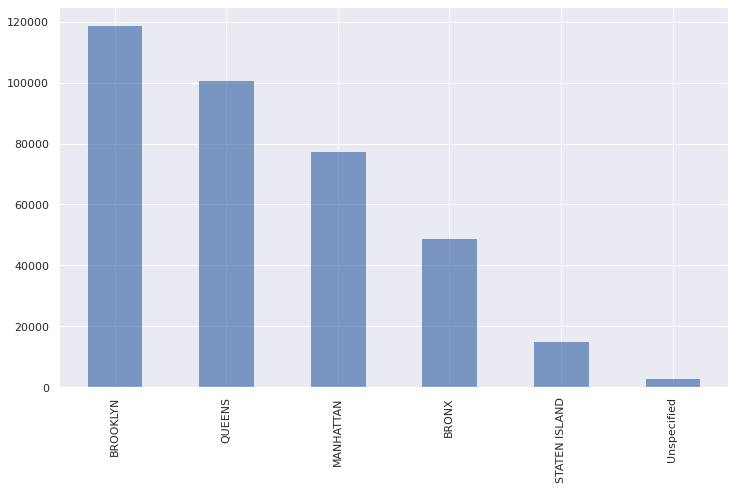

In [14]:
#Count Plot for Coloumn Borough
plt.figure(figsize=(12,7))
df['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

In [15]:
#Percentage of cases in each Borough
for x in df["Borough"].unique():
    print("Percentage of Request from ",x," Division : ",round((df["Borough"]==x).sum()/len(df)*100,2))

Percentage of Request from  MANHATTAN  Division :  21.25
Percentage of Request from  QUEENS  Division :  27.64
Percentage of Request from  BRONX  Division :  13.49
Percentage of Request from  BROOKLYN  Division :  32.6
Percentage of Request from  Unspecified  Division :  0.81
Percentage of Request from  STATEN ISLAND  Division :  4.21


In [16]:
#Unique Location Types
df["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [17]:
#Request Closing Time for all location Type sorted in ascending Order
pd.DataFrame(df.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
Location Type,
Subway Station,145.120000
Club/Bar/Restaurant,183.492218
House of Worship,190.052861
Store/Commercial,192.928792
Highway,204.372348
Park/Playground,206.594724
Bridge,229.458333
Street/Sidewalk,261.052945
Residential Building,267.260350


<p style-"color:red">We see that maximum(mean) time  to resolve the complaint is taken in Park,Vacant Lot and Commercial areas whereas the cases in the Subway Station and Restaurent are resolved in very less time

In [18]:
#Request Closing Time for all City sorted in ascending Order
pd.DataFrame(df.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
City,
ARVERNE,137.840605
ROCKAWAY PARK,139.602908
LITTLE NECK,155.031437
OAKLAND GARDENS,156.240167
BAYSIDE,160.062978
FAR ROCKAWAY,161.193068
NEW YORK,175.343723
FLUSHING,177.446478
FOREST HILLS,184.097636


<h2 style="color:red;">Handling Missing Values

In [19]:
#Percentage Of Missing Value
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Garage Lot Name,100.000000
Vehicle Type,100.000000
Taxi Pick Up Location,100.000000
Taxi Company Borough,100.000000
Ferry Direction,99.999726
Ferry Terminal Name,99.999451
Road Ramp,99.928132
Bridge Highway Segment,99.928132
Bridge Highway Direction,99.918531


<p style="color:green;">We see that all the data related to school columns are empty which must be  because none of the request or complaint are from the school sector. Thus we can go on and remove that column.

In [20]:
#Remove the column with very high percentage of missing value
new_df=df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

In [21]:
print("Old DataFrame Shape :",df.shape)
print("New DataFrame Shape : ",new_df.shape)

Old DataFrame Shape : (364558, 54)
New DataFrame Shape :  (364558, 40)


In [22]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


<p style="color:green;">We see that all the data above have not much details, are Unspecified. So we can remove those columns to ease our analysis

In [23]:
new_df.drop(rem,axis=1,inplace=True)

In [24]:
new_df.shape

(364558, 26)

In [25]:
#Remove columns that are not needed for our analysis
rem1=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_df.drop(rem1,axis=1,inplace=True)

In [26]:
new_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,MANHATTAN,55.500000
1,2015-12-31 23:59:44,2016-01-01 01:26:57,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,QUEENS,87.216667
2,2015-12-31 23:59:29,2016-01-01 04:51:03,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,BRONX,291.566667
3,2015-12-31 23:57:46,2016-01-01 07:43:13,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,BRONX,465.450000
4,2015-12-31 23:56:58,2016-01-01 03:24:42,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,QUEENS,207.733333


<h2 style="color:red;">Hypothesis Testing</h2>

(0.0, 2000.0)

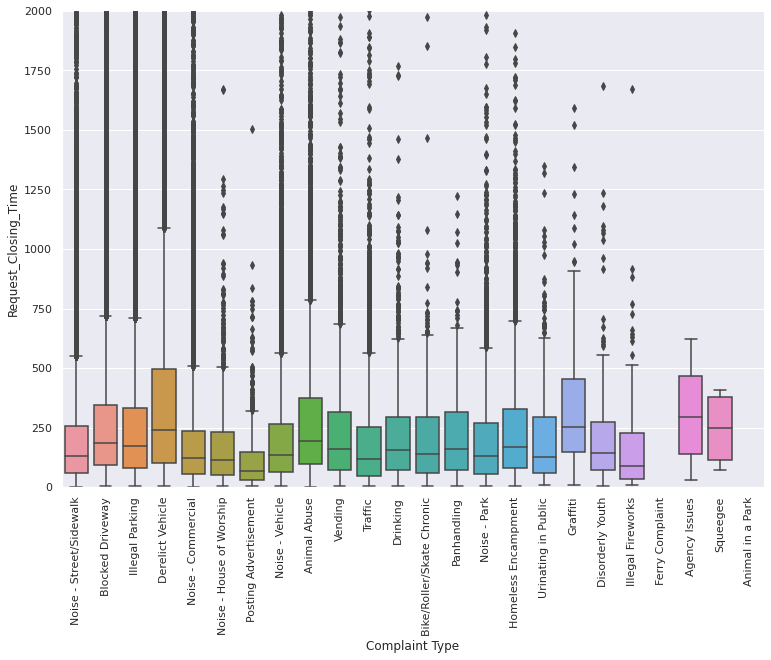

In [27]:
g=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=new_df)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

$H_0 : \text{ there is no significant different in mean of Request_Closing_Time for different Complaint}\\
H_1 : \text{there is signficant different in mean of Request_Closing_Time for different Complaint}$

In [28]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.500000,Noise - Street/Sidewalk
1,87.216667,Blocked Driveway
2,291.566667,Blocked Driveway
3,465.450000,Illegal Parking
4,207.733333,Illegal Parking


In [29]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.487316e+09,6.760526e+07,565.26157,0.0
Residual,362154.0,4.331361e+10,1.196000e+05,NaN,NaN


<p style="color:green;">Since p value for the Complaint is less that 0.01 thus we accept alternate hypothesis i.e there is significant difference in the mean response time w.r.t different type of complaint.

$H_0 : \text{Complaint  Type and Location Type are independent}\\
H_1 : \text{Complaint Type and Location Type  are  related}$

In [30]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]

chi_sq.dropna(inplace=True)

In [31]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [32]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


<p style="color:green;">Since p value for the chi square test is less than 0.05(LOS) we can conclude that Complaint Type is dependent on Location Type i.e specific type of complaint is raised from specific places,

<h1 style="color:tomato;"><center>Conclusions</h1>
<ul style="color:blue;">
    <li>Maximum Complaints are raised in road and parking (vehicle) related sectors</li>
    <li>On an average complains are closed in an span of 150 to 300 hours</li>
    <li>Transport and Road related issues are taking more time to get resolved as number of these cases are quite high.</li>
    <li>Number of cases from Borough goes as follows BROOKLYN > QUEENS > MANHATTAN > BRONX > STATEN ISLAND</li>
    <li>Complaint Type are Depentent on Location Type.</li>
    <li>Time taken for solving different complaint type are different</li>
</li>